## Some fundamental elements of programming III
### Understanding and creating correlated datasets and how to create functions

As we said before, the core of data science is computer programming. 

To really explore data, we need to be able to write code to 

  (1) wrangle or even generate data that has the properties needed for analysis and 
  
  (2) do actual data analysis and visualization.

If data science didn't involve programming – if it only involved clicking buttons in a statistics program like SPSS – it wouldn't be called data *science*. In fact, it wouldn't even be a "thing" at all.

Learning goals:
 
 - Understand how to generate correlated variables.
 
 - Understand function definitions in Python

#### Generate correlated datasets

In thispart of the tutorial we will learn how generate datasets that are 'related.' While doing that we will practice a few things learned recently in previous tutorials:

  - Plotting with matplotlib
  - generating numpy arrays
  - indexing into arrays
  - using `while` loops

First thing first, we will import the basic libraries we need.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

After that we will create a few datasets. More specifically, we will create `n` datasets each called `x` (say 5 datasets, where `n=5`). Each dataset will have the length of `m` (where for example, `m` could be 100), this means for example that each dataset will have the shape of (m,1) or in our example (100,1).

After that, we will create another group of `n` datasets called `y` of the same shape of `x`. Each one of the `y` datasets will have a corresponding `x` dataset that it will be correlated with.

This means that for each dataset in `x` there will be a dataset in `y` that is correlated with it.

Let's get started with a hands on method. Forst we will make the example of a single dataset `x` and a correlated dataset `y`.

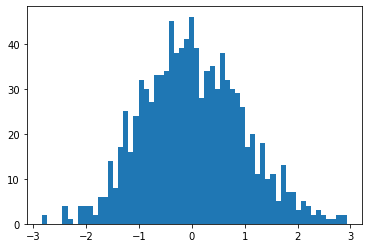

In [4]:
# We first build the dataset `x`, 
# we will use our standard method
# based on randn
m  = 1000;
mu = 5;
sd = 1;
x  = np.random.randn(m,1);

# let take a look at it
plt.hist(x, 60);

OK. After generating the first dataset we will generate a second dataset, let's call it `y`. This second dataset will be correlated to the first.

To generate a dataset correlated to `x` we will indeed use `x` as our base for the data and add on top of `x` a small amount of noise, let's call it `noise`. `noise` represents the small (or larger) difference between `x` and `y`. 

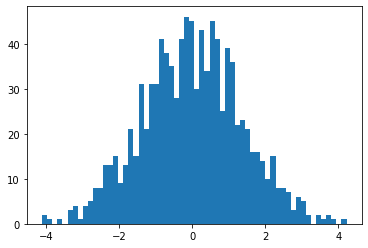

In [5]:
err = np.random.randn(m,1);
y = x + err
plt.hist(y,60);

OK. The two histograms seem similar (similar range and height), but it is difficult to judge if `x` and `y` are indeed correlated. To do that we need to make a scatter plot.

`matplotlib` has a convenient function for scatter plots, `plt.scatter()`, we will use that function to take a look at whether the two datasets are correlated.

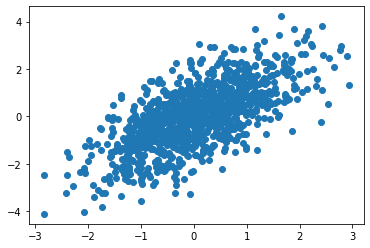

In [6]:
plt.scatter(x,y)

Great, the symbols should be aligned along the major diagonal. This means that they are indeed correlated. To get to understand more what we did above, let's think about `err`.

Imagine, if there were no error, e.g., no `err`. That would mean that there would be no difference between `x` and `y`. Literally, the two datasets would be identical.

We can do that with the code above by setting `err` to `0`.

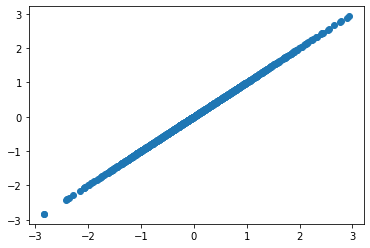

In [7]:
err = 0
y = x + err
plt.scatter(x,y)

The symbols should all lay on the major diagonal. So, `err` effectively controls the level of correlation between `x` and `y`. So if we set it to something small, in other words if we add only a small amount of error then the two arrays (`x` and `y`) would be very similar. For example, let's try setting it up to 10% of the original `err`.

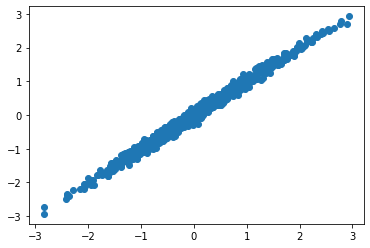

In [8]:
err = np.random.randn(m,1);
err = err*0.1 # 0.1 -> scaling factor
y = x + err
plt.scatter(x,y)

OK. It should have worked. The error added is not large, the symbols should lay almost on the diagonal, but not quite.

As we increase the `err` the symbols should move away from the diagonal.

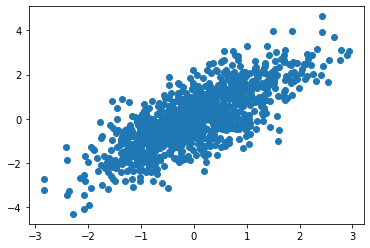

In [9]:
err = np.random.randn(m,1);
scaling_factor = 0.9
err = err*scaling_factor 
y = x + err
plt.scatter(x,y)

One way to think about the scaling factor and `err` is that they are related to correlation. Indeed, they are not directly related to correlation. 

The scaling factor is inversely related to correlation because as the scaling factor increases the correlation decreases. Furthermore, they are not directly related to correlation because they both depend on a couple of variables, for example, the variance of the distributions (both `err` and `x` will affect the relationship between the correlation and the scaling factor).

Python has a method to generate couples of correlated arrays. We will now briefly explore it, but leave a deeper dive on each function to you. You are suggested to further explore the code below and its implications. It might come helpful to us later down the road, you never know!

#### A more principled way to make correlated datasets

NumPy has a function called `multivariate_normal` that generates pairs of correlated datasets. The correlation values can be specified conveniently. A little bit of thinking is required, though. The function uses the covariance matrix. The covariance matrix is composed of 4 numbers. Two of the numbers describe the variances of the two datasamples we want to generate. The other two values describe the correlation between the samples and are generally called `covariances` (co-variations or co-relations).

[[-1.03324373 -0.86153205]
 [-1.06134915 -0.39110699]
 [ 0.63187821  1.47814951]
 ...
 [-1.19607259 -1.32345113]
 [-1.07812573 -0.82777989]
 [-1.35895744 -1.38303763]]
(1000,)


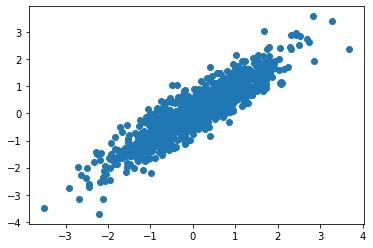

In [6]:
from  numpy.random import multivariate_normal # we import the function
x_mu = 0; # we set up the mean of the first set of data points 
y_mu = 0; # we set up the mean of the second sample
x_var = 1; # the variance of the first sample
y_var = 1; # the variance of the second sample
cov = 0.9; # this is the covariance (can be thought of as correlation)

# the function multivariate_normal will need a matrix to control
# the relation between the samples, this matrix is called covariance matrix
cov_m = [[x_var, cov],
         [cov, y_var]]

# we now create the two data sets by setting the the proper
# means and passing the covariance matrix, we also pass the
# requested size of the sample
data = multivariate_normal([x_mu, y_mu], cov_m, size=1000)

# We can plot the two data sets
x, y = data[:,0], data[:,1]
print(data)
print(x.shape)
plt.scatter(x, y)

#### Creating many correlated datasets

Imagine now if we were asked to create a series of correlated datasets. Not one, nottwo, more than that.

Once the basic code used to build one is known. The rest of the datasets can be generated reusing the same code and putting the code inside a loop. Below we will show how to create 5 datasets using a `while` loop.

Plotting dataset:  1


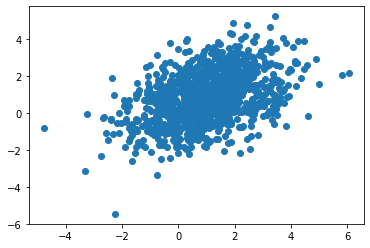

Plotting dataset:  2


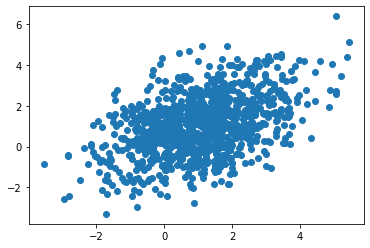

Plotting dataset:  3


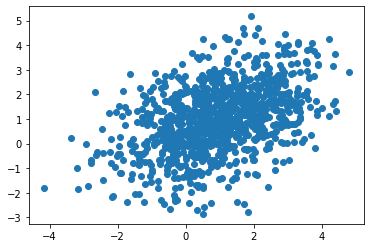

Plotting dataset:  4


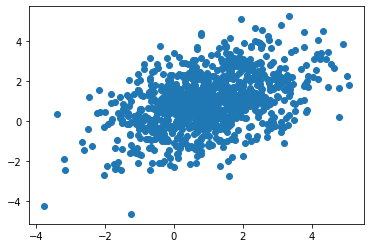

Plotting dataset:  5


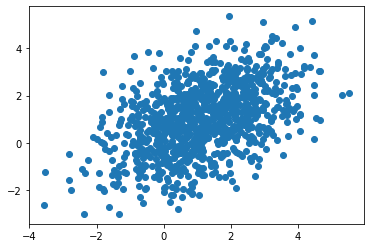

DONE Plotting datasets!


In [13]:
counter = 0;
n_datasets = 5;
siz_datasets = 1000;

x_mu = 1;  # mean of the first dataset 
y_mu = 1;  # mean of the second dataset
x_var = 2; # the variance of the first dataset
y_var = 2; # the variance of the second dataset
cov = 0.85; # this is the covariance (can be thought of as correlation)

# covariance matrix
cov_m = [[x_var, cov],
         [cov, y_var]]

while counter < n_datasets :
    data = multivariate_normal([x_mu, y_mu], 
                               cov_m, 
                               size=siz_datasets)
    x, y = data[:,0], data[:,1]
    counter = counter + 1

    # Make a plot, show it, wait some time
    print("Plotting dataset: ", counter)
    plt.scatter(x, y);
    plt.show() ;
    plt.pause(0.05)

else:
    print("DONE Plotting datasets!")